In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Math, HTML, display, Markdown, Latex

import numpy as np
import pandas as pd
from sklearn import datasets

import seaborn as sns; sns.set()
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
 
from utils.utility_plots import create_dynamic_h_plot

# Linear Regression - part 1
(Univariate Linear Regression)

Linear regression is a supervised learning method whereby we would like to fit a line in such a way that the error is minimal.  
E.g. in this notebook we try to fit a line which predict the housing prices given the average number of rooms per dwelling.

But first of all, what does a Univariate Linear Regression look like
$$h_{0}(x) = \theta_{0} + \theta_{1}x\\
or  \\
y = \alpha + \beta x  \\
or  \\
y = mx + c    \\
or  \\
y = mx + b
$$

$\theta_{1}, \beta, m$ are called the slope or gradient, how much does go the line up (or down) when we take 1 step on the X-axis  
$\theta_{0}, \alpha, c, b$ are the interceptions with the Y-axis  
  
Also notice that you can find $y = mx + b$ back inside a perceptron without an activation function $y = w_{0} + \sum_{i=1}^{n} x_{i} . w_{i}$


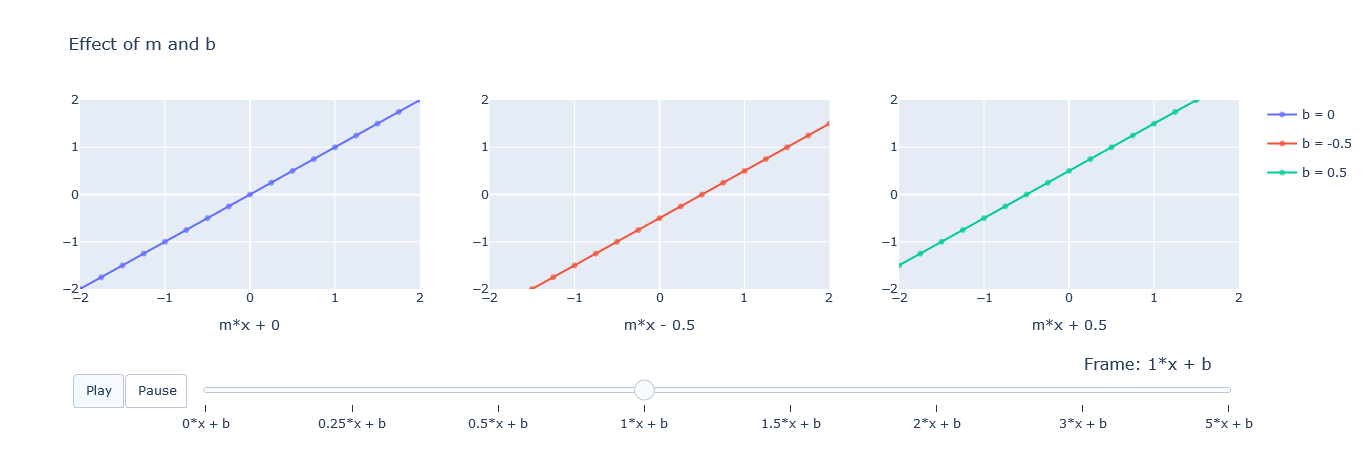

In [16]:
from utils.utility_plots import create_dynamic_h_plot, Data2Plot

data2plot = Data2Plot()

# create 3 dynamic figures
data2plot.prepare_dynamic_data(name='b = 0')
data2plot.prepare_dynamic_data(name='b = -0.5', panel=2)
data2plot.prepare_dynamic_data(name='b = 0.5', panel=3)

# Create a range of m (slope values)
for m in [0, 0.25, 0.5, 1, 1.5, 2, 3, 5]:
    b = 0
    data2plot.feed_dynamic_data(name='b = 0', x= np.arange(-3,3,0.25), y= [ m*x + b for x in np.arange(-3,3,0.25)])
    
    b = -0.5
    data2plot.feed_dynamic_data(name='b = -0.5',  x= np.arange(-3,3,0.25), y= [ m*x + b for x in np.arange(-3,3,0.25)])
    
    b = 0.5
    data2plot.feed_dynamic_data(name='b = 0.5',  x= np.arange(-3,3,0.25), y= [ m*x + b for x in np.arange(-3,3,0.25)])
    
    data2plot.add_frame_label(f'{m}*x + b')
    
# plot
create_dynamic_h_plot(data2plot, 
                      title="Effect of m and b",
                      x_axis_1='m*x + 0', x_range_1=[-2,2], y_range_1=[-2,2],
                      x_axis_2='m*x - 0.5', x_range_2=[-2,2], y_range_2=[-2,2],
                      x_axis_3='m*x + 0.5', x_range_3=[-2,2], y_range_3=[-2,2])

# Load the diabetes dataset

In [3]:
feature_matrix, target, feature_names, descr, _ = datasets.load_boston().values()
display(Markdown('## Info'))
print(descr)

display(Markdown('## Feature Matrix'))
feature_matrix = pd.DataFrame(feature_matrix, columns=feature_names)
display(feature_matrix.head())

display(Markdown('## target'))
target = pd.DataFrame(target, columns=['y'])
display(target.head())

## Info

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Feature Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## target

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


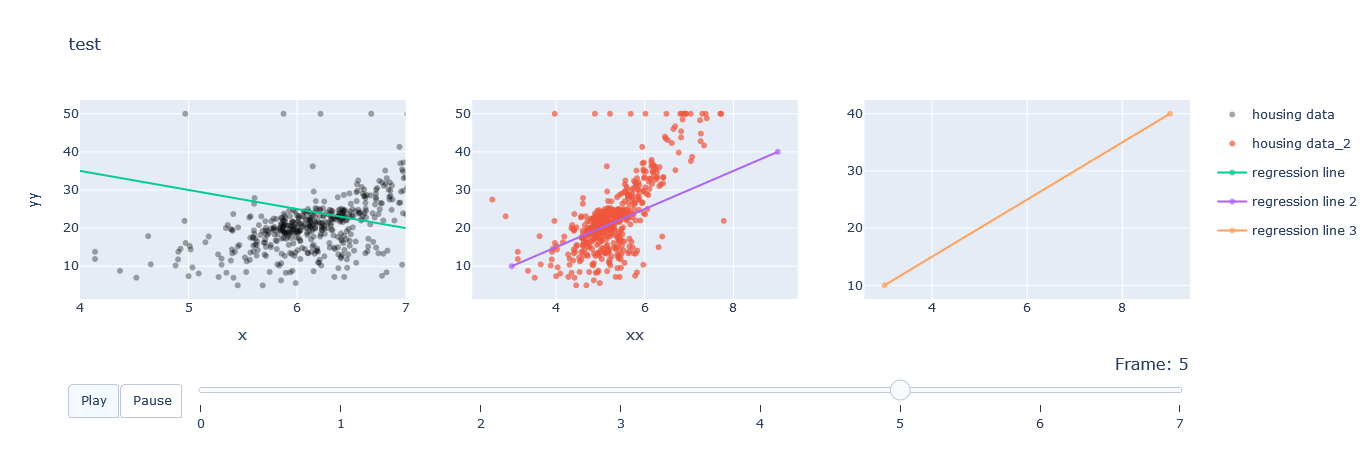

In [13]:
from utils.utility_plots import create_dynamic_h_plot, Data2Plot

data2plot = Data2Plot()

# add static data
data2plot.add_static_data(name= 'housing data', x= feature_matrix.RM, y= target.y, mode="markers", rgb_colour=(0,0,0,0.5))
data2plot.add_static_data(name= 'housing data_2', x= feature_matrix.RM-1, y= target.y, mode="markers", panel=2)

# create dynamic figure
data2plot.prepare_dynamic_data(name='regression line')
data2plot.prepare_dynamic_data(name='regression line 2', panel=2)
data2plot.prepare_dynamic_data(name='regression line 3', panel=3)
for v in [[0,50],[5,45],[10,40],[20,30],[30,20],[40,10],[45,5],[50,0]]:
    data2plot.feed_dynamic_data(name='regression line', x=[3,9], y=v)
    data2plot.feed_dynamic_data(name='regression line 2', x=[3,9], y=(v[1],v[0]))
    data2plot.feed_dynamic_data(name='regression line 3', x=[3,9], y=(v[1],v[0]))
    
    
create_dynamic_h_plot(data2plot, title="test", x_axis_2='xx', y_axis_1='yy', x_range_1=[4,7])
